In [31]:
#PREDECIR ENFERMEDADES DEL CORAZON
#basado en https://www.youtube.com/watch?v=pUS8gqRDDZw
import numpy as np
import pandas as pd
data = pd.DataFrame(pd.np.empty((0, 10)))   
data = pd.read_csv('enfermedades_corazon.csv',quotechar=",") #quotechar porque los nombres de columnas se separan por una ','
data.head()

,"""V1","""""V2""""","""""V3""""","""""V4""""","""""V5""""","""""V6""""","""""V7""""","""""V8""""","""""V9""""","""""Class"""""""
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [39]:
#cambiamos el nombre de las columnas
data.columns = ['sbp','Tabaco','ldl','Adiposity','Familia','Tipo','Obesidad','Alcohol','Edad','chd']
data.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Tipo,Obesidad,Alcohol,Edad,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [33]:
#analizamos datos
data.dtypes #son todos enteros y flotantes asi que OK

spb            int64
Tabaco       float64
ldl          float64
Adiposity    float64
Familia        int64
Tipo           int64
Obesidad     float64
Alcohol      float64
Edad           int64
chd            int64
dtype: object

In [34]:
#a ver si hay datos perdidos
data.isnull().sum() #todo 'ceros' = OK

spb          0
Tabaco       0
ldl          0
Adiposity    0
Familia      0
Tipo         0
Obesidad     0
Alcohol      0
Edad         0
chd          0
dtype: int64

In [40]:
#si vemos los datos veremos que hemos de modificar varias  columnas:
 #familia y chd: tiene valores de 1 o 2, lo dejaremos en 0 o 1
 #sbp: tiene una escala de datos mayor que el resto asi que hemos de escalarlos entre 0 y 100

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Familia']=encoder.fit_transform(data['Familia'])
data['chd']=encoder.fit_transform(data['chd'])


from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler((feature_range)=(0,100))
data['sbp']=scale.fit_transform(data['sbp'].values.reshape(-1,1))
data.head()

,sbp,Tabaco,ldl,Adiposity,Familia,Tipo,Obesidad,Alcohol,Edad,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


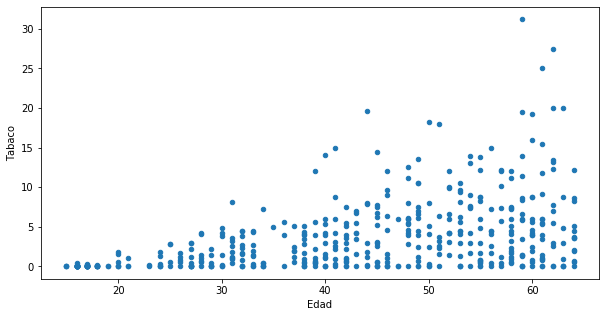

In [44]:
#visualizar Tabaco vs. Edad
data.plot(x='Edad', y='Tabaco', kind='scatter', figsize=(10,5))

In [ ]:
#### CON ESTO HEMOS TERMINADO DE PREPROCESAR DATOS, AHORA PASAMOS A LOS ALGORITMOS DE ML ####

In [45]:
#Analisis NL
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

#definir variable dependiente e independientes
y = data['chd']
X = data.drop('chd', axis=1) #x es todas las columnas excepto chd

#separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#definimos algoritmo a utilizar
algoritmo = svm.SVC(kernel='linear')

#entrenamos el modelo con los datos que separamos antes
algoritmo.fit(X_train, y_train)

#realizar prediccion con el modelo obtenido
y_test_pred = algoritmo.predict(X_test)

#calcular matriz de confusion
print(confusion_matrix(y_test, y_test_pred)) #67datos correctos (57+10), 26 incorrectos (17+9)

[[57  9]
 [17 10]]


In [53]:
accuracy_score(y_test, y_test_pred) #0,72
precision_score(y_test, y_test_pred) #0,52 

# nos reafirma lo obtenido en la matriz de confusion: que nuestro modelo es malo 
# por lo que hay que probar otras caracteristicas y otros algoritmos de clasificacion

0.5263157894736842